---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Project Name (replace with your project name)
Project description (replace with your project description, you can use the same from the `INFO.md` file.

### Project Repo 
link (replace if you have your own repo, otherwise delete)

## Participants:
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester
Add here in which course and in which semester it was done.

### License
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

In [26]:
# Here you can start your code! Thanks

This is example code for the bakery data. You DO NOT need to use this.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

In [28]:
DATA_FOLDER = './../data/dataset1/'
SALES_DATA = 'sales.csv'
WEATHER_DATA = 'wheather.csv'
KIWO_DATA = 'kiwo.csv'

In [29]:
sales_df = pd.read_csv(os.path.join(DATA_FOLDER, SALES_DATA))
sales_df

Date  Group       Sales
0      2013-07-01      1  148.828353
1      2013-07-02      1  159.793757
2      2013-07-03      1  111.885594
3      2013-07-04      1  168.864941
4      2013-07-05      1  171.280754
...           ...    ...         ...
10864  2018-12-22      6   66.737353
10865  2018-12-23      6   49.958196
10866  2018-12-24      6   46.130749
10867  2018-12-27      6   51.623140
10868  2018-12-28      6   35.220810

[10869 rows x 3 columns]

In [30]:
weather_df = pd.read_csv(os.path.join(DATA_FOLDER, WEATHER_DATA))
weather_df

Date  Cloudiness  Temperature  Wind Speed  Weather Code
0     2012-01-01         8.0       9.8250          14          58.0
1     2012-01-02         7.0       7.4375          12           NaN
2     2012-01-03         8.0       5.5375          18          63.0
3     2012-01-04         4.0       5.6875          19          80.0
4     2012-01-05         6.0       5.3000          23          80.0
...          ...         ...          ...         ...           ...
2596  2019-07-28         3.0      23.3500          14           5.0
2597  2019-07-29         6.0      25.2500           7          61.0
2598  2019-07-30         7.0      20.7375           8          61.0
2599  2019-07-31         6.0      20.4500           7          61.0
2600  2019-08-01         5.0      21.0625           9          61.0

[2601 rows x 5 columns]

In [31]:
kiwo_df = pd.read_csv(os.path.join(DATA_FOLDER, KIWO_DATA))
kiwo_df

Date  KielerWoche
0   2012-06-16            1
1   2012-06-17            1
2   2012-06-18            1
3   2012-06-19            1
4   2012-06-20            1
..         ...          ...
67  2019-06-26            1
68  2019-06-27            1
69  2019-06-28            1
70  2019-06-29            1
71  2019-06-30            1

[72 rows x 2 columns]

In [32]:
# check the values for a specific group
for group in range(0,6):
    print(f"we have {len(sales_df[sales_df['Group'] == (group+1)])} days for group {group+1}")

we have 2115 days for group 1
we have 2115 days for group 2
we have 2115 days for group 3
we have 2061 days for group 4
we have 2115 days for group 5
we have 348 days for group 6


<AxesSubplot:>

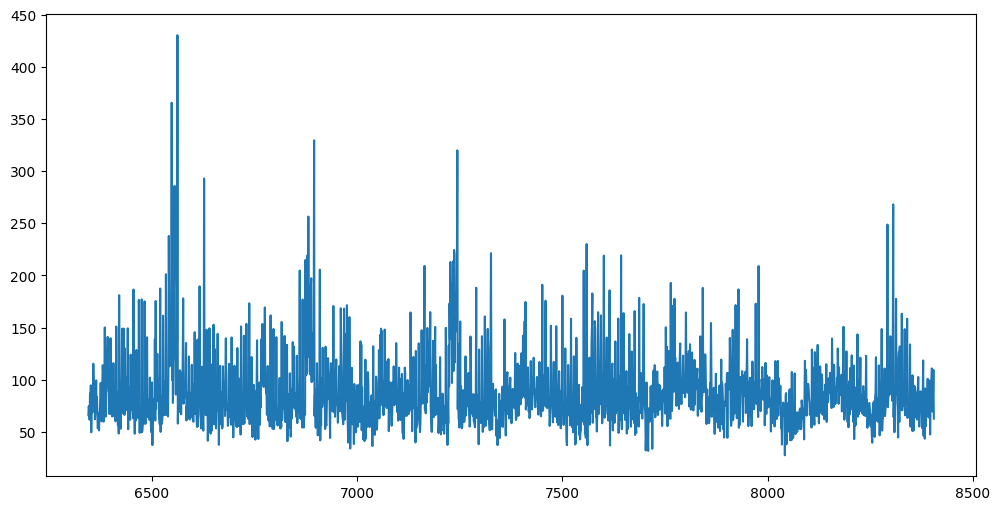

In [33]:
# plot some data using pandas
sales_df[sales_df['Group'] == (4)]['Sales'].plot(figsize=(12,6))

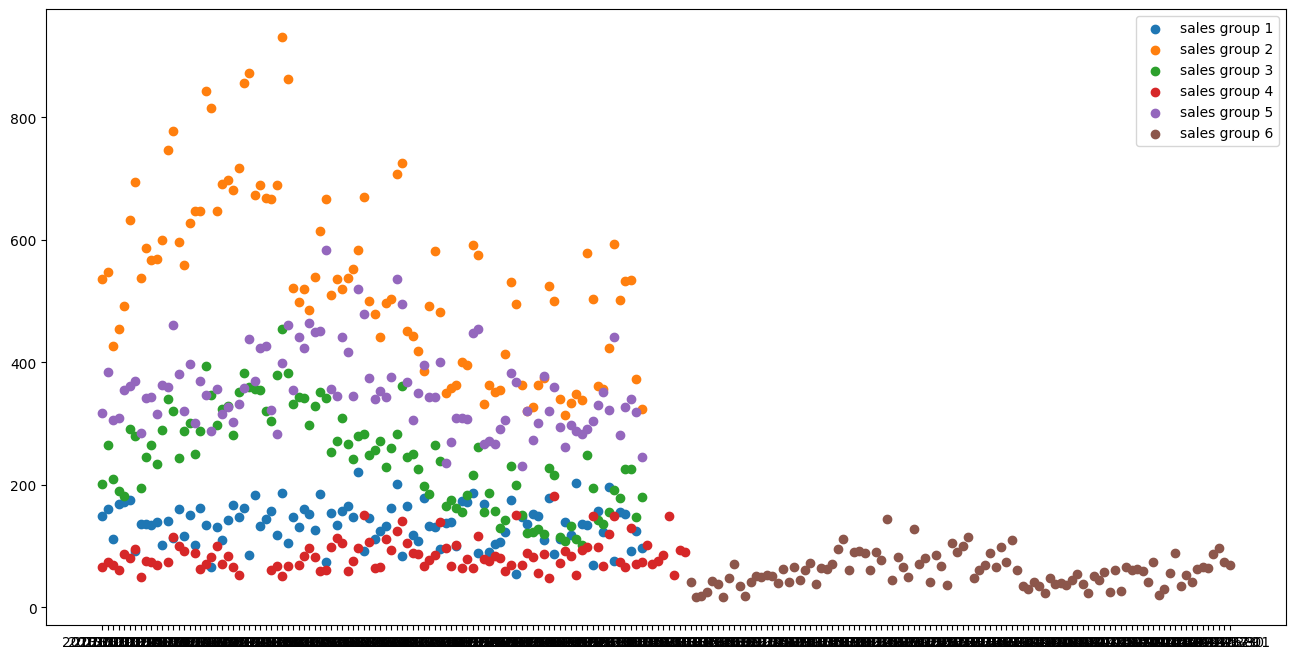

In [34]:
#plot 100 points of each sales group using matplotlib
plt.figure(figsize=(16,8))
for sale_nr in range(1, 7):
    current_sales = sales_df[sales_df['Group'] == (sale_nr)]
    plt.scatter(current_sales['Date'][0:100], current_sales['Sales'][0:100], label=f"sales group {sale_nr}")

plt.legend()

In [35]:
# Create a standard time frame using earliest date and most recent date
datetime = pd.date_range('2013-07-01', periods=2161, freq='D')
datetime

DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-04',
               '2013-07-05', '2013-07-06', '2013-07-07', '2013-07-08',
               '2013-07-09', '2013-07-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', length=2161, freq='D')

In [36]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
G1s = sales_df[sales_df['Group'] == (1)]
G1s = G1s.set_index(pd.to_datetime(G1s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G2s = sales_df[sales_df['Group'] == (2)]
G2s = G2s.set_index(pd.to_datetime(G2s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G3s = sales_df[sales_df['Group'] == (3)]
G3s = G3s.set_index(pd.to_datetime(G3s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G4s = sales_df[sales_df['Group'] == (4)]
G4s = G4s.set_index(pd.to_datetime(G4s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G5s = sales_df[sales_df['Group'] == (5)]
G5s = G5s.set_index(pd.to_datetime(G5s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G6s = sales_df[sales_df['Group'] == (6)]
G6s = G6s.set_index(pd.to_datetime(G6s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

In [37]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
kiwo_df = kiwo_df.set_index(pd.to_datetime(kiwo_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
kiwo_df

KielerWoche
2013-07-01          NaN
2013-07-02          NaN
2013-07-03          NaN
2013-07-04          NaN
2013-07-05          NaN
...                 ...
2019-05-27          NaN
2019-05-28          NaN
2019-05-29          NaN
2019-05-30          NaN
2019-05-31          NaN

[2161 rows x 1 columns]

In [38]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
weather_df = weather_df.set_index(pd.to_datetime(weather_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
weather_df

Cloudiness  Temperature  Wind Speed  Weather Code
2013-07-01         6.0      17.8375        15.0          20.0
2013-07-02         3.0      17.3125        10.0           NaN
2013-07-03         7.0      21.0750         6.0          61.0
2013-07-04         7.0      18.8500         7.0          20.0
2013-07-05         5.0      19.9750        12.0           NaN
...                ...          ...         ...           ...
2019-05-27         6.0      15.2625        13.0           NaN
2019-05-28         6.0      13.1625        12.0           NaN
2019-05-29         3.0      13.3625         8.0           0.0
2019-05-30         7.0      14.0125         9.0          61.0
2019-05-31         7.0      18.8500        14.0           NaN

[2161 rows x 4 columns]

In [39]:
# create a standard dataframe to contain all timeseries data
df_standard= pd.DataFrame(datetime, columns=['Date'])
df_standard = df_standard.set_index(df_standard['Date']).drop(['Date'], axis=1).asfreq(freq='D')
df_standard['G1_Sales']= np.nan
df_standard['G2_Sales']= np.nan
df_standard['G3_Sales']= np.nan
df_standard['G4_Sales']= np.nan
df_standard['G5_Sales']= np.nan
df_standard['G6_Sales']= np.nan
df_standard['Cloudiness']= np.nan
df_standard['Temperature']= np.nan
df_standard['Wind Speed']= np.nan
df_standard['Weather Code']= np.nan
df_standard['KielerWoche']= np.nan

df_standard

G1_Sales  G2_Sales  G3_Sales  G4_Sales  G5_Sales  G6_Sales  \
Date                                                                     
2013-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-03       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-04       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2019-05-27       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-28       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-29       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-31       NaN       NaN       NaN       NaN       NaN       NaN   

            Cloudiness  Temperature  Wind Speed  Weather Code  KielerWoche  
Date                                                                        
2013-07-01         NaN          NaN         NaN           NaN          NaN  
2013-07-02         NaN          NaN         NaN           NaN          NaN  
2013-07-03         NaN          NaN         NaN           NaN          NaN  
2013-07-04         NaN          NaN         NaN           NaN          NaN  
2013-07-05         NaN          NaN         NaN           NaN          NaN  
...                ...          ...         ...           ...          ...  
2019-05-27         NaN          NaN         NaN           NaN          NaN  
2019-05-28         NaN          NaN         NaN           NaN          NaN  
2019-05-29         NaN          NaN         NaN           NaN          NaN  
2019-05-30         NaN          NaN         NaN           NaN          NaN  
2019-05-31         NaN          NaN         NaN           NaN          NaN  

[2161 rows x 11 columns]

In [40]:
# consolidate all data into standard dataframe
for date in datetime:
    df_standard.loc[date]['G1_Sales'] = G1s.loc[date]['Sales']
    df_standard.loc[date]['G2_Sales'] = G2s.loc[date]['Sales']
    df_standard.loc[date]['G3_Sales'] = G3s.loc[date]['Sales']
    df_standard.loc[date]['G4_Sales'] = G4s.loc[date]['Sales']
    df_standard.loc[date]['G5_Sales'] = G5s.loc[date]['Sales']
    df_standard.loc[date]['G6_Sales'] = G6s.loc[date]['Sales']

    df_standard.loc[date]['Cloudiness'] = weather_df.loc[date]['Cloudiness']
    df_standard.loc[date]['Temperature'] = weather_df.loc[date]['Temperature']
    df_standard.loc[date]['Wind Speed'] = weather_df.loc[date]['Wind Speed']
    df_standard.loc[date]['Weather Code'] = weather_df.loc[date]['Weather Code']
    df_standard.loc[date]['KielerWoche'] = kiwo_df.loc[date]['KielerWoche']

df_standard

G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  \
Date                                                                     
2013-07-01  148.828353  535.856285  201.198426   65.890169  317.475875   
2013-07-02  159.793757  546.780787  265.261254   74.543917  383.628682   
2013-07-03  111.885594  427.343259  210.260241   69.262728  305.523072   
2013-07-04  168.864941  454.859641  190.686641   61.490175  308.408168   
2013-07-05  171.280754  492.818804  181.644870   86.759861  355.518770   
...                ...         ...         ...         ...         ...   
2019-05-27  135.089885  343.556064  148.559756  108.839265  319.487926   
2019-05-28  154.363980  325.469954  143.560611   69.413548  244.543724   
2019-05-29  190.850121  410.842197  150.235794   85.864240  261.402964   
2019-05-30   85.145930  577.007683  278.094458  109.264552  358.531072   
2019-05-31  215.454052  531.418072  238.703043   62.585166  290.409849   

            G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  \
Date                                                                      
2013-07-01       NaN         6.0      17.8375        15.0          20.0   
2013-07-02       NaN         3.0      17.3125        10.0           NaN   
2013-07-03       NaN         7.0      21.0750         6.0          61.0   
2013-07-04       NaN         7.0      18.8500         7.0          20.0   
2013-07-05       NaN         5.0      19.9750        12.0           NaN   
...              ...         ...          ...         ...           ...   
2019-05-27       NaN         6.0      15.2625        13.0           NaN   
2019-05-28       NaN         6.0      13.1625        12.0           NaN   
2019-05-29       NaN         3.0      13.3625         8.0           0.0   
2019-05-30       NaN         7.0      14.0125         9.0          61.0   
2019-05-31       NaN         7.0      18.8500        14.0           NaN   

            KielerWoche  
Date                     
2013-07-01          NaN  
2013-07-02          NaN  
2013-07-03          NaN  
2013-07-04          NaN  
2013-07-05          NaN  
...                 ...  
2019-05-27          NaN  
2019-05-28          NaN  
2019-05-29          NaN  
2019-05-30          NaN  
2019-05-31          NaN  

[2161 rows x 11 columns]

In [41]:
#replace all NAN values with 0
df_standard_ = df_standard.fillna(0)
df_standard_

G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  \
Date                                                                     
2013-07-01  148.828353  535.856285  201.198426   65.890169  317.475875   
2013-07-02  159.793757  546.780787  265.261254   74.543917  383.628682   
2013-07-03  111.885594  427.343259  210.260241   69.262728  305.523072   
2013-07-04  168.864941  454.859641  190.686641   61.490175  308.408168   
2013-07-05  171.280754  492.818804  181.644870   86.759861  355.518770   
...                ...         ...         ...         ...         ...   
2019-05-27  135.089885  343.556064  148.559756  108.839265  319.487926   
2019-05-28  154.363980  325.469954  143.560611   69.413548  244.543724   
2019-05-29  190.850121  410.842197  150.235794   85.864240  261.402964   
2019-05-30   85.145930  577.007683  278.094458  109.264552  358.531072   
2019-05-31  215.454052  531.418072  238.703043   62.585166  290.409849   

            G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  \
Date                                                                      
2013-07-01       0.0         6.0      17.8375        15.0          20.0   
2013-07-02       0.0         3.0      17.3125        10.0           0.0   
2013-07-03       0.0         7.0      21.0750         6.0          61.0   
2013-07-04       0.0         7.0      18.8500         7.0          20.0   
2013-07-05       0.0         5.0      19.9750        12.0           0.0   
...              ...         ...          ...         ...           ...   
2019-05-27       0.0         6.0      15.2625        13.0           0.0   
2019-05-28       0.0         6.0      13.1625        12.0           0.0   
2019-05-29       0.0         3.0      13.3625         8.0           0.0   
2019-05-30       0.0         7.0      14.0125         9.0          61.0   
2019-05-31       0.0         7.0      18.8500        14.0           0.0   

            KielerWoche  
Date                     
2013-07-01          0.0  
2013-07-02          0.0  
2013-07-03          0.0  
2013-07-04          0.0  
2013-07-05          0.0  
...                 ...  
2019-05-27          0.0  
2019-05-28          0.0  
2019-05-29          0.0  
2019-05-30          0.0  
2019-05-31          0.0  

[2161 rows x 11 columns]

In [42]:
#save standard dataframe as seperate combined dataset
df_standard_.to_csv(os.path.join(DATA_FOLDER, 'combined_dataset.csv'))

$cd /usr/local/lib/python3.8/dist-packages/scaleogram# cws.py
root@c2c0a9bd9691:/usr/local/lib/python3.8/dist-packages/scaleogram# nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

df = pd.read_csv(os.path.join(DATA_FOLDER, 'combined_dataset.csv'))
# df.set_index(pd.to_datetime(df['Date'])).drop(['Date'], axis=1).asfreq(freq='D')
df.set_index(pd.to_datetime(df['Date'])).asfreq(freq='D')

# conversion of dates
datetime = pd.to_datetime(df['Date'])
df.insert(0, 'datetime', datetime)

datetime_lim = [ df.datetime.min(), df.datetime.max() ] 
years_lim = [ df.datetime.min().year, df.datetime.max().year ]

def set_x_yearly(ax, days, start_year=2013):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1])
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)


G1_sales = df[['datetime', 'G1_Sales']].groupby('datetime').sum().squeeze()
G2_sales = df[['datetime', 'G2_Sales']].groupby('datetime').sum().squeeze()
G3_sales = df[['datetime', 'G3_Sales']].groupby('datetime').sum().squeeze()
G4_sales = df[['datetime', 'G4_Sales']].groupby('datetime').sum().squeeze()
G5_sales = df[['datetime', 'G5_Sales']].groupby('datetime').sum().squeeze()
G6_sales = df[['datetime', 'G6_Sales']].groupby('datetime').sum().squeeze()


Number of available days: 2161


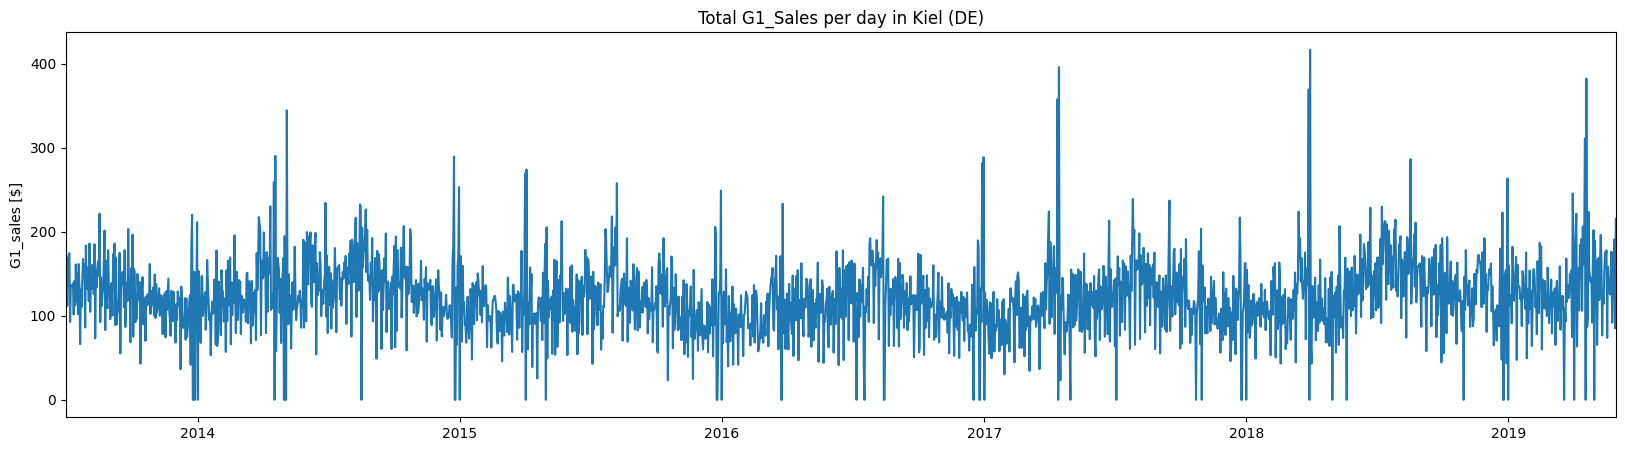

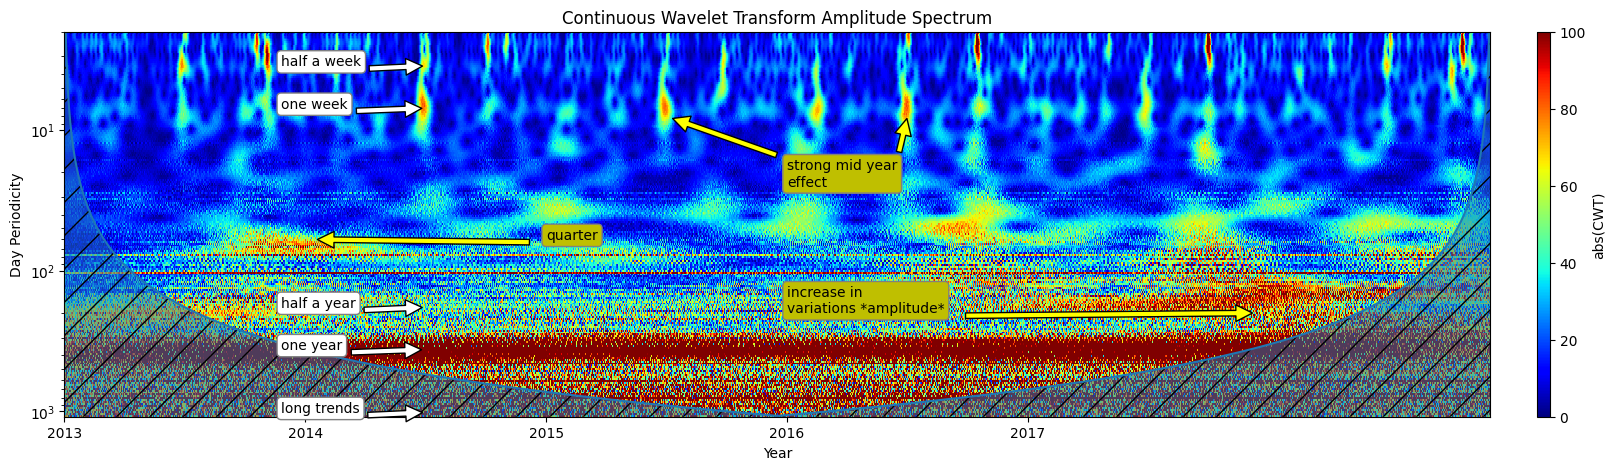

In [45]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G1_sales.index, G1_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G1_sales [$]"); plt.title("Total G1_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

G1_sales_normed = G1_sales-G1_sales.mean()
ax = scg.cws(G1_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,100), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G1_sales_normed))
print("Number of available days:", len(G1_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Observations

    G1_sales per day : The G1_sales data shows no continuous periodic features as expected at the year scales and smaller ones
    The CWT reveals a lot of information in a short amount of time:

    A weekly variation showing the habits in the hospitals is present over several decades
        A second stripe at half a week is expected as the weekly patter is not an axact cosinus
        An increase in the weekly pattern is visible in the 80's which can be either caused by a change in the work habits of the hospitals, a change in birthrate or simple variation of the population
    A strong yearly trend is present which is a well known seasonal variation in the birthrates, humans are visibly prone to it ;)
        A second stripe at half a year is clearly a second harmonic
        Fuzzy patterns appears in the 3 to 1 month zone that could be due to a third harmonic, as tha yearly variation are so strong. It may also be caused by holiday impact on birth rate and may need further study
    An end-of-year effect has been spotted around christmas and January the 1st. This one may have remained unseen with other frequency based method.

    
The scaleogram has been

    Built from normalized data (mean removal)
    Log-scaled to be more readable at all scales

Adjusting the scales

The amplitude range of the color map (Z axis) is now set with the clim=(0,2500) parameter. The exact value for the amplitude of variations is dependent of the wavelet but will stay close to the order of the real value, see the cos wave plot for hints.

To see the yearly features an appropriate scales range is generated with period2scales().

    

Number of available days: 2161


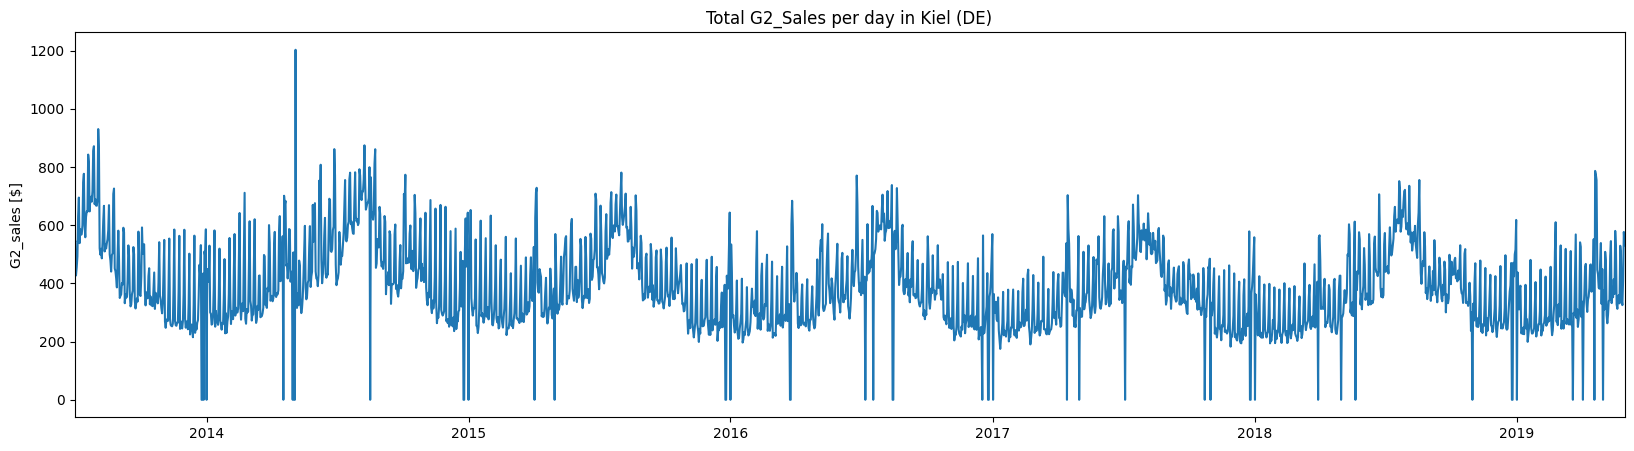

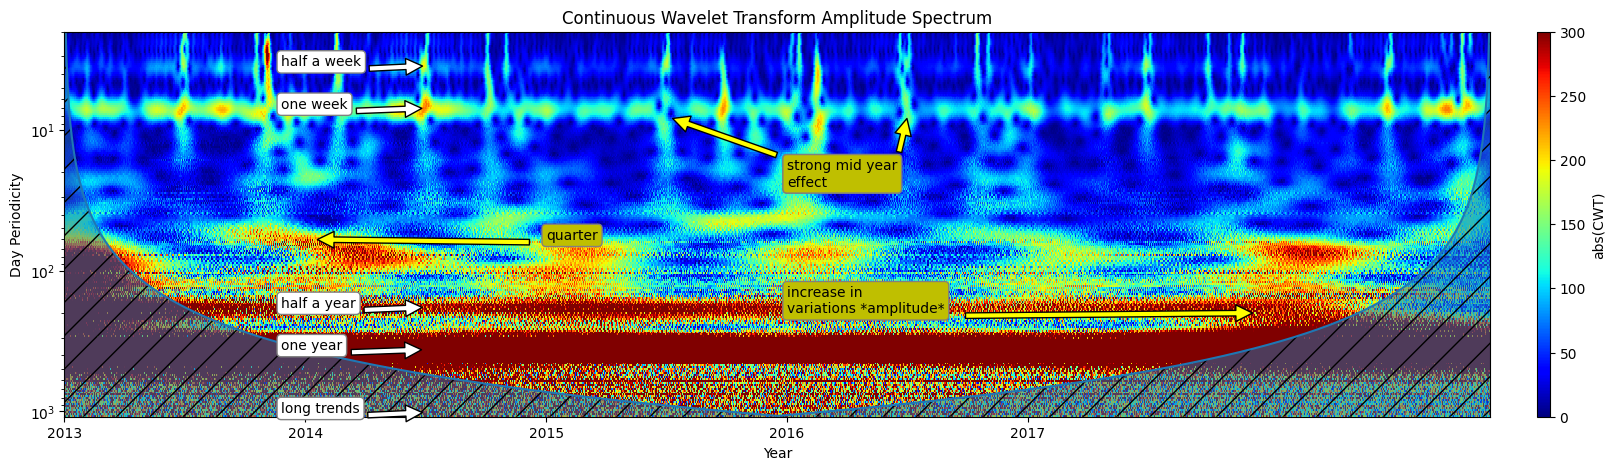

In [65]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G2_sales.index, G2_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G2_sales [$]"); plt.title("Total G2_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

G2_sales_normed = G2_sales-G2_sales.mean()
ax = scg.cws(G2_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,300), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G2_sales_normed))
print("Number of available days:", len(G2_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


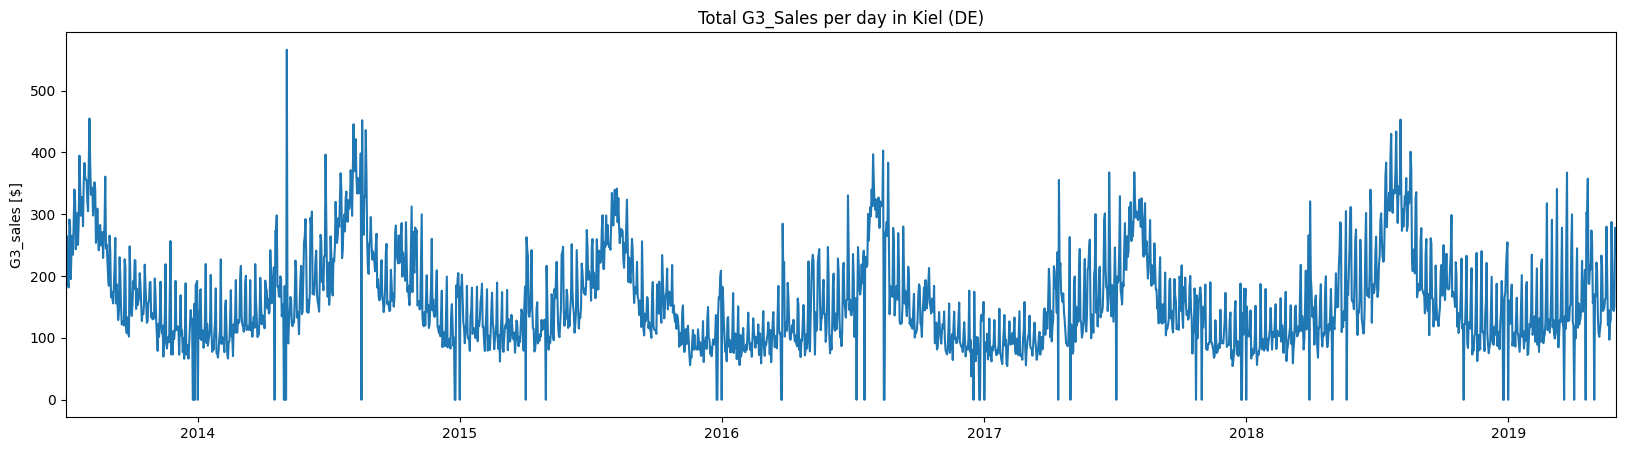

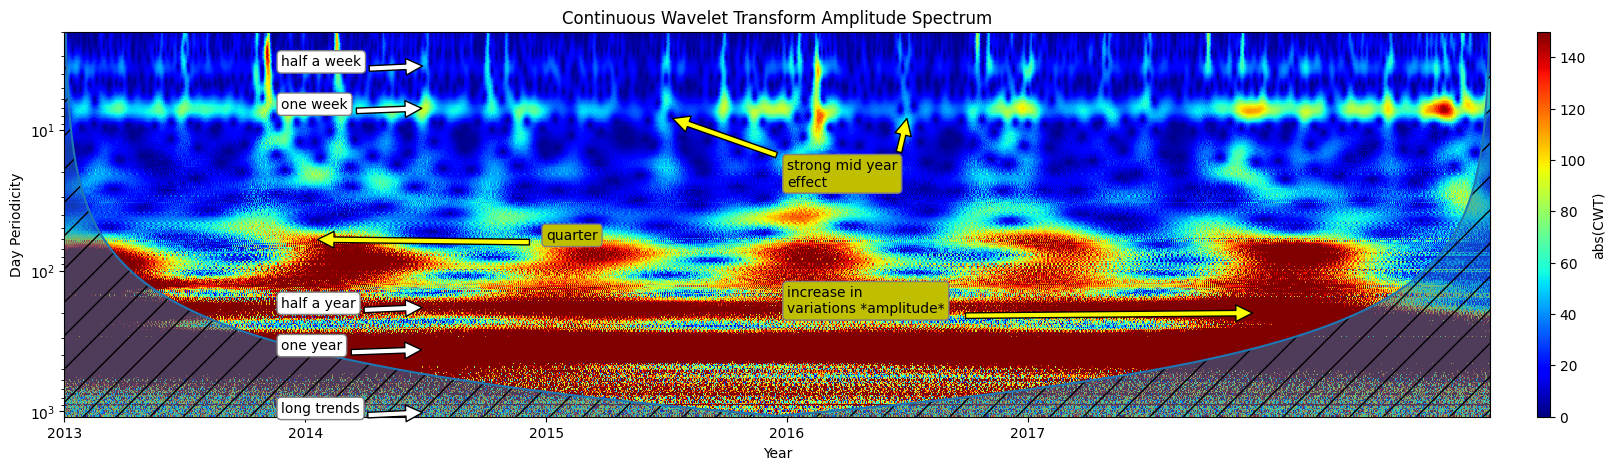

In [66]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G3_sales.index, G3_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G3_sales [$]"); plt.title("Total G3_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G3_sales_normed = G3_sales-G3_sales.mean()
ax = scg.cws(G3_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,150), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G3_sales_normed))
print("Number of available days:", len(G3_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


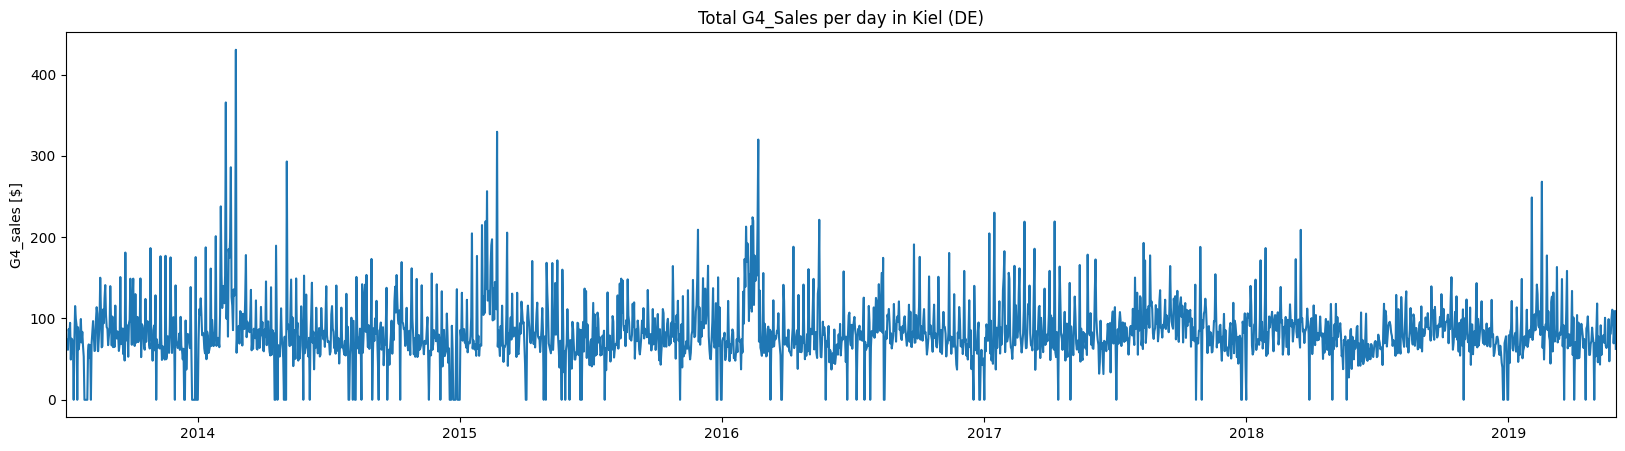

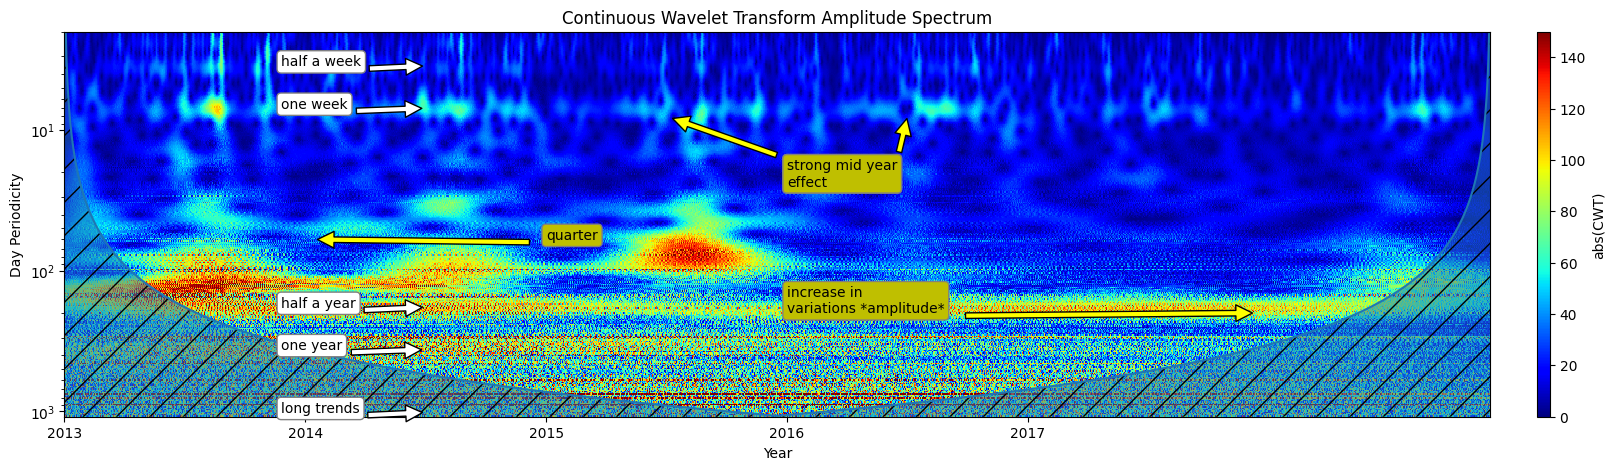

In [67]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G4_sales.index, G4_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G4_sales [$]"); plt.title("Total G4_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G4_sales_normed = G4_sales-G4_sales.mean()
ax = scg.cws(G4_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,150), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G4_sales_normed))
print("Number of available days:", len(G4_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


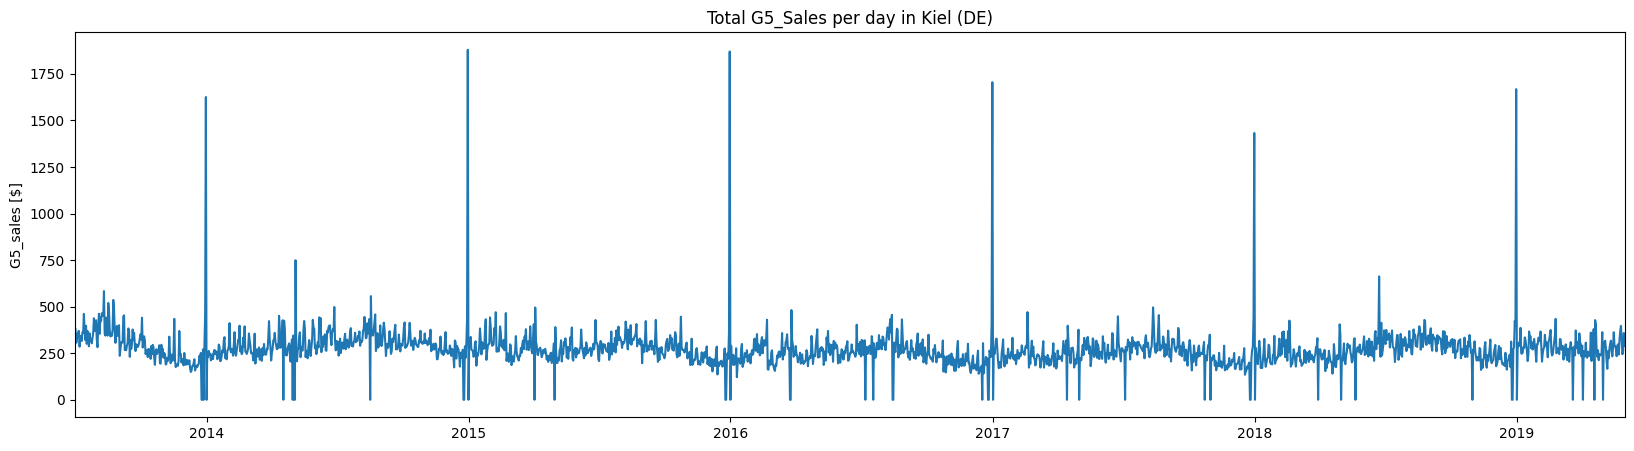

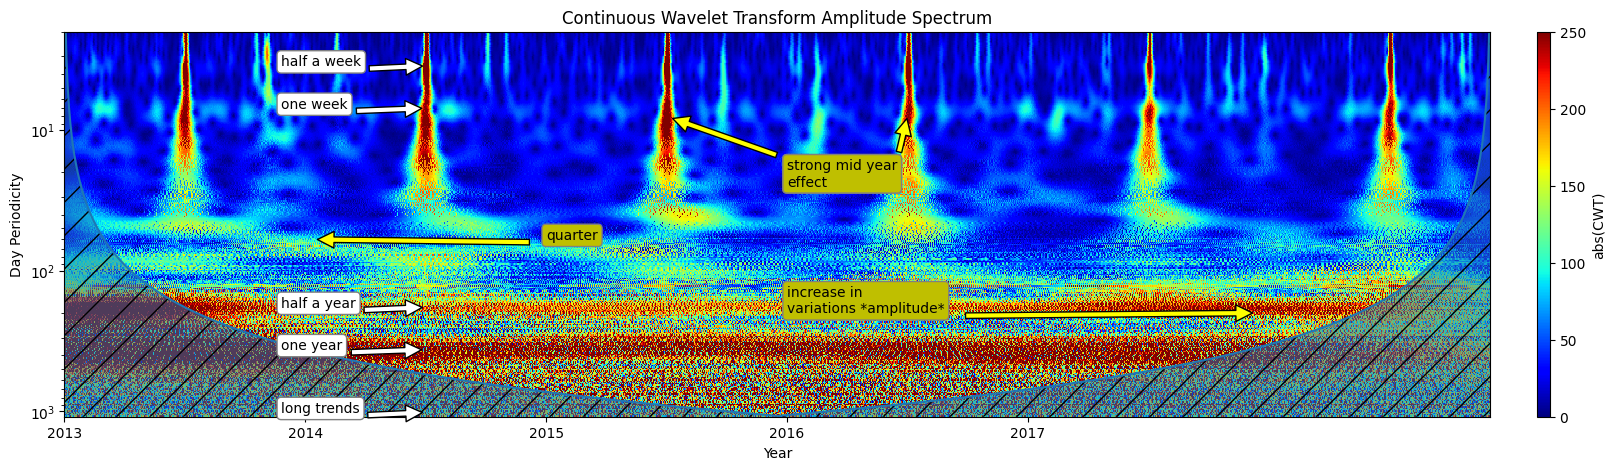

In [68]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G5_sales.index, G5_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G5_sales [$]"); plt.title("Total G5_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G5_sales_normed = G5_sales-G5_sales.mean()
ax = scg.cws(G5_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,250), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G5_sales_normed))
print("Number of available days:", len(G5_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


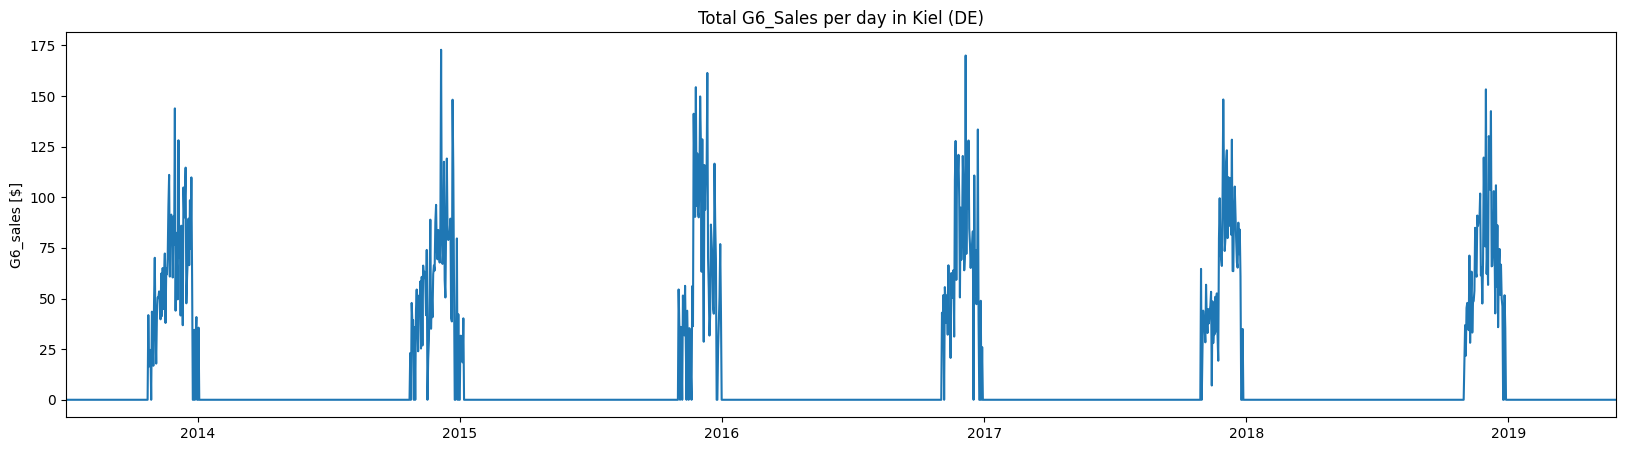

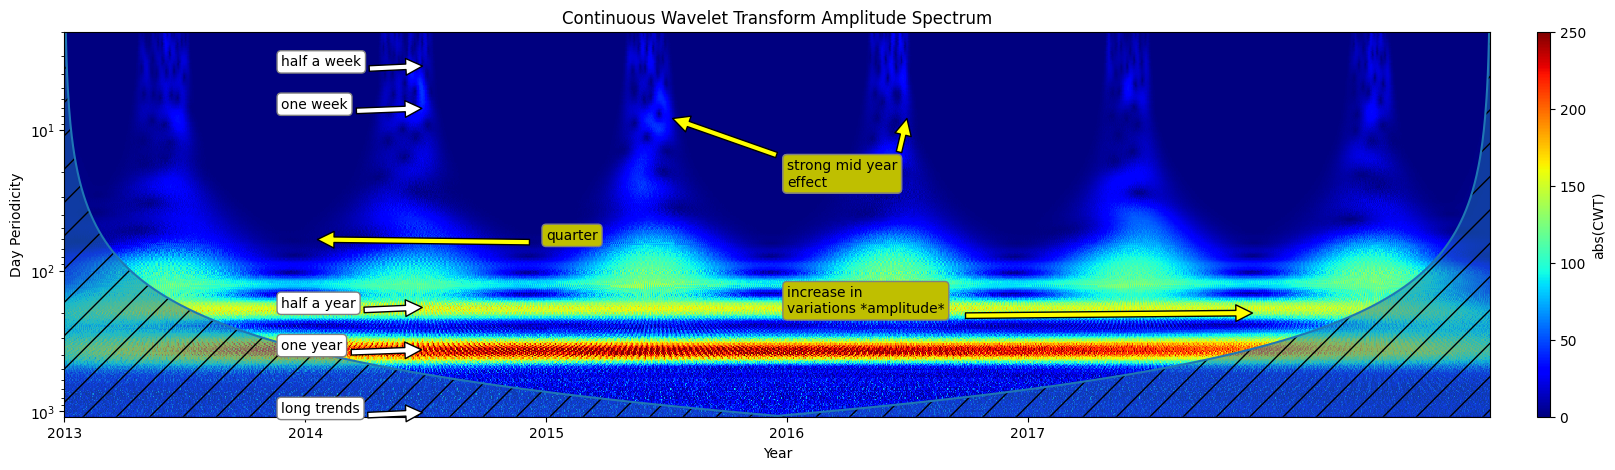

In [70]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G6_sales.index, G6_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G6_sales [$]"); plt.title("Total G6_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G6_sales_normed = G6_sales-G6_sales.mean()
ax = scg.cws(G6_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,250), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G6_sales_normed))
print("Number of available days:", len(G6_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

